In [2]:
articles = open('article.txt', 'r')

In [3]:
d = articles.readlines()

In [39]:
import numpy as np
dictionary = []
large_corpus = []
for _ in d:
    c = []
    a = _.split()
    for __ in a:
        if a == '|':
            continue
        c.append(__)
    large_corpus.append(c)

In [42]:
print(len(large_corpus))

1041


अग्रपंक्तिमा


In [44]:
import gensim.models.word2vec as w2v
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import multiprocessing

In [43]:
num_features = 100
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed =1

In [53]:
nepali2vec = w2v.Word2Vec(
    large_corpus,
    size = 150,
    window = 5,
    min_count = 2,
    workers = num_workers
)

In [54]:
nepali2vec.train(large_corpus, total_examples=len(large_corpus), epochs=10)

(2260374, 2610800)

In [55]:
len(nepali2vec.wv.vocab)

15605

In [82]:
nepali2vec.wv.most_similar(positive='प्रधानमन्त्री')

[('शेरबहादुर', 0.9527615308761597),
 ('देउवाले', 0.9401972889900208),
 ('देउवा', 0.9289330840110779),
 ('देउवाको', 0.8487265706062317),
 ('देउवाजीलाई', 0.8440738916397095),
 ('देउवाबाट', 0.8367385864257812),
 ('प्रधानमन्त्रीतर', 0.8226032257080078),
 ('छन्प्रधानमन्त्री', 0.8208463788032532),
 ('दलहरुसँगको', 0.8121257424354553),
 ('प्रचण्डलाई', 0.8113064765930176)]

In [62]:
import sklearn.manifold

In [63]:
tsne = sklearn.manifold.TSNE(n_components = 2, random_state = 0)

In [66]:
all_word_vector_matrix = nepali2vec.wv.vectors

In [67]:
all_word_vector_matrix_2d = tsne.fit_transform(all_word_vector_matrix)

In [70]:
sns.set_context('poster')
import pandas as pd

In [75]:
all_word_vector_matrix_2d[100]

array([-77.44046 ,  -6.545823], dtype=float32)

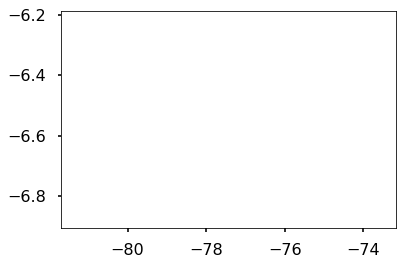

In [76]:
plt.plot(all_word_vector_matrix_2d[100][0], all_word_vector_matrix_2d[100][1])

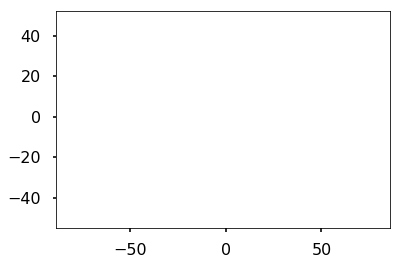

In [77]:
for i in all_word_vector_matrix_2d:
    plt.plot(i[0], i[1])

In [86]:
nepali2vec.wv.save('vect')

AttributeError: 'numpy.ndarray' object has no attribute 'save'